# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key
from config import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        lat = city_weather["coord"]["lat"]
        lng = city_weather["coord"]["lon"]
        temp_max = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = datetime.datetime.fromtimestamp(city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": lat, 
                          "Lng": lng, 
                          "Max Temp": temp_max,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | newman
Processing Record 3 of Set 1 | hawaiian paradise park
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | howrah
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | cidreira
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | capacuaro
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | ust-nera
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | paita
Processing Record 20 of Set 1 | taiohae
City not found. Skipping...
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [6]:
# Output File (CSV)
city_data_df.to_csv("../output_data/cities.csv", index=False)

In [7]:
# Read exported data
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display the saved data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,26.39,83,40,5.14,MP,2024-04-11 15:25:43
1,newman,37.3138,-121.0208,25.58,52,15,0.89,US,2024-04-11 15:25:43
2,hawaiian paradise park,19.5933,-154.9731,22.80,98,100,3.09,US,2024-04-11 15:25:44
3,west island,-12.1568,96.8225,25.99,83,68,3.09,CC,2024-04-11 15:25:44
4,howrah,22.5892,88.3103,27.00,61,40,0.00,IN,2024-04-11 15:25:44


In [8]:
# Show statistical description of the data set
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,565.000000,565.000000,565.000000,565.00000,565.000000,565.000000
mean,19.634414,19.239369,17.381628,71.19823,61.582301,3.912531
std,31.764156,88.056303,12.499048,22.39965,41.158305,2.463643
min,-54.800000,-176.559700,-28.150000,5.00000,0.000000,0.000000
25%,-6.981100,-54.708300,10.810000,60.00000,18.000000,2.060000
50%,21.978900,26.891000,20.020000,77.00000,75.000000,3.600000
75%,45.932600,90.220100,26.950000,87.00000,100.000000,5.140000
max,78.218600,178.441500,42.070000,100.00000,100.000000,14.430000


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

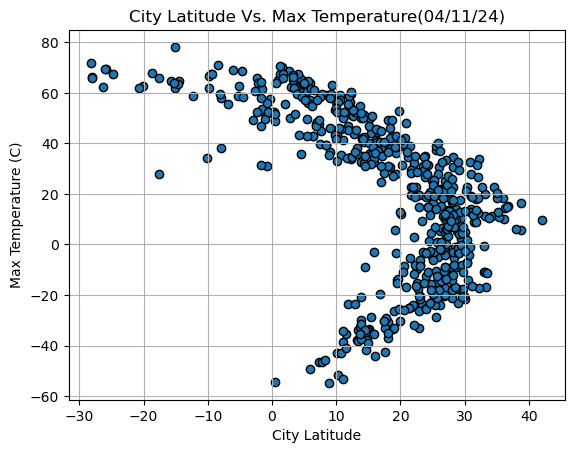

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Max Temp"],
            city_data_df["Lat"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("City Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

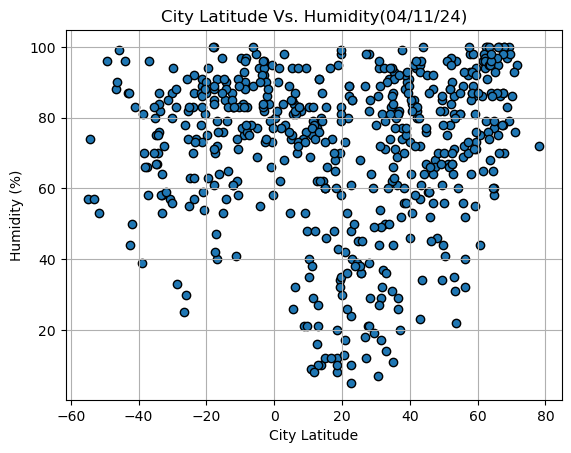

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("City Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

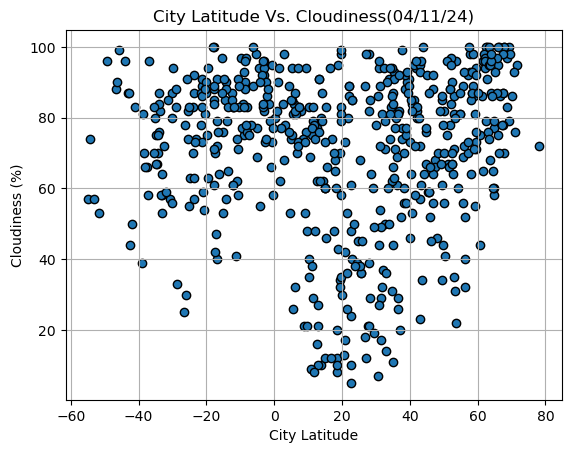

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

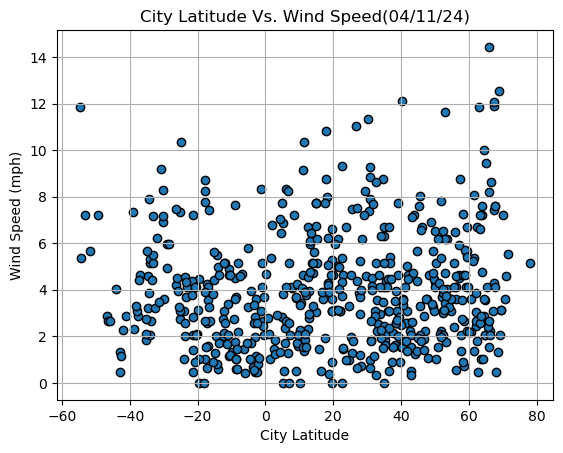

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("City Latitude")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define northern and southern hemisphere 
North_hem = city_data_df.loc[city_data_df["Lat"]>=0]
South_hem = city_data_df.loc[city_data_df["Lat"]<0]

Northern Hemisphere: Temperature vs. Latitude Linear Regression

Southern Hemisphere: Temperature vs. Latitude Linear Regression

r-square: 0.6159606803137433


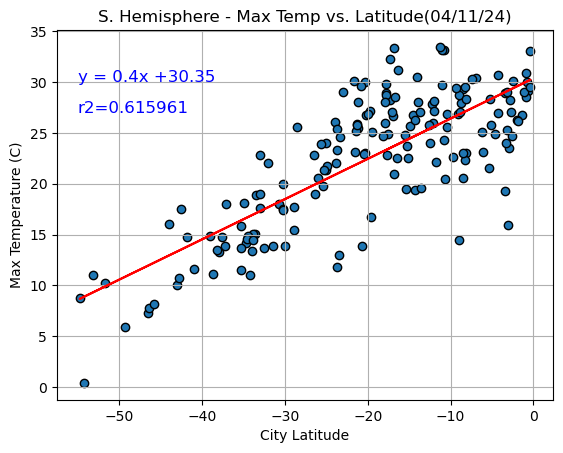

r-square < 0.7. The city latitue at southern hemisphere shows no strong correlation with max temperature


In [40]:
# Declare variables 
x_values = South_hem["Lat"]
y_values = South_hem["Max Temp"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "r2=" + str(round(rvalue**2, 6))
# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("S. Hemisphere - Max Temp vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.annotate(line_eq,xy=(-55,30),fontsize=12,color="blue")
plt.annotate(r2, xy=(-55,27),fontsize=12,color="blue")

#Save the figure
plt.savefig("../output_data/S_temp_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square < 0.7. The city latitue at southern hemisphere shows no strong correlation with max temperature")


Northern Hemisphere: Humidity vs. Latitude Linear Regression

r-square: 0.1063570553344808


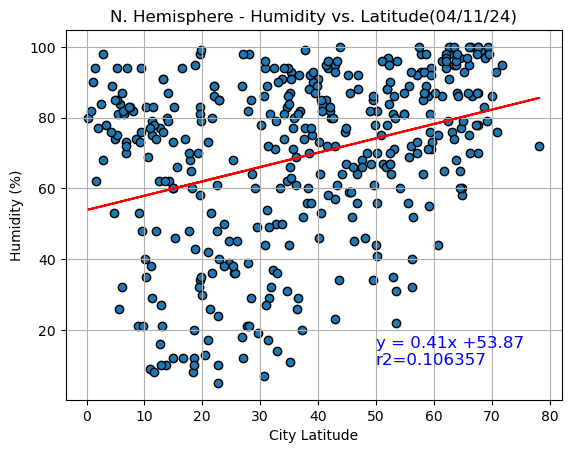

r-square << 0.7. The city latitue at northern hemisphere shows no correlation with humidity


In [38]:
# Declare variables 
x_values = North_hem["Lat"]
y_values = North_hem["Humidity"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "r2=" + str(round(rvalue**2, 6))
# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("N. Hemisphere - Humidity vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.annotate(line_eq,xy=(50,15),fontsize=12,color="blue")
plt.annotate(r2, xy=(50,10),fontsize=12,color="blue")
#Save the figure
plt.savefig("../output_data/N_Humidity_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at northern hemisphere shows no correlation with humidity")

Southern Hemisphere: Humidity vs. Latitude Linear Regression 

r-square: 0.05335993777992409


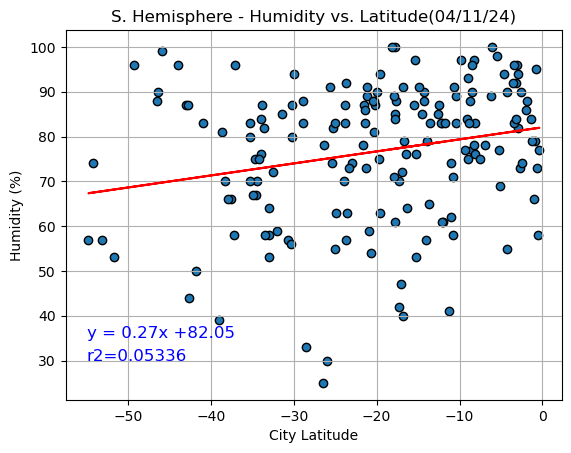

r-square << 0.7. The city latitue at southern hemisphere shows no correlation with humidity


In [42]:
# Declare variables 
x_values = South_hem["Lat"]
y_values = South_hem["Humidity"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "r2=" + str(round(rvalue**2, 6))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("S. Hemisphere - Humidity vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.annotate(line_eq,xy=(-55,35),fontsize=12,color="blue")
plt.annotate(r2, xy=(-55,30),fontsize=12,color="blue")
#Save the figure
plt.savefig("../output_data/S_Humidity_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at southern hemisphere shows no correlation with humidity")

Northern Hemisphere: Cloudiness vs. Latitude Linear Regression

r-square: 0.028217847343199046


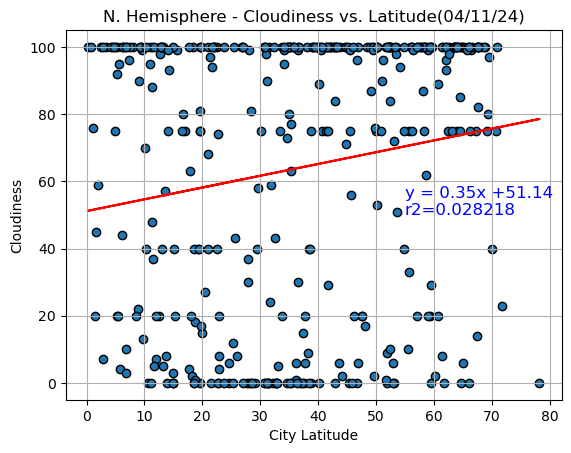

r-square << 0.7. The city latitue at northern hemisphere shows no correlation with Cloudiness


In [43]:
# Declare variables 
x_values = North_hem["Lat"]
y_values = North_hem["Cloudiness"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "r2=" + str(round(rvalue**2, 6))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("N. Hemisphere - Cloudiness vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.annotate(line_eq,xy=(55,55),fontsize=12,color="blue")
plt.annotate(r2, xy=(55,50),fontsize=12,color="blue")
#Save the figure
plt.savefig("../output_data/N_Cloudiness_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at northern hemisphere shows no correlation with Cloudiness")

Southern Hemisphere: Cloudiness vs. Latitude Linear Regression

r-square: 0.02383904590788855


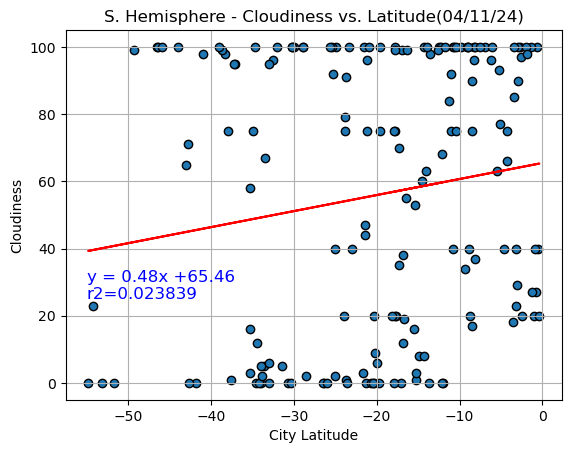

r-square << 0.7. The city latitue at southern hemisphere shows no correlation with Cloudiness


In [44]:
# Declare variables 
x_values = South_hem["Lat"]
y_values = South_hem["Cloudiness"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "r2=" + str(round(rvalue**2, 6))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("S. Hemisphere - Cloudiness vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.annotate(line_eq,xy=(-55,30),fontsize=12,color="blue")
plt.annotate(r2, xy=(-55,25),fontsize=12,color="blue")
#Save the figure
plt.savefig("../output_data/S_Cloudiness_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at southern hemisphere shows no correlation with Cloudiness")

Northern Hemisphere: Wind Speed vs. Latitude Linear Regression

r-square: 0.006452774058352618


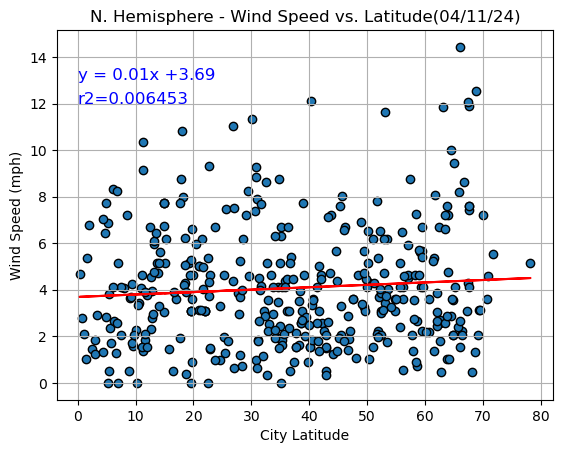

r-square << 0.7. The city latitue at northern hemisphere shows no correlation with Wind Speed


In [46]:
# Declare variables 
x_values = North_hem["Lat"]
y_values = North_hem["Wind Speed"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "r2=" + str(round(rvalue**2, 6))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("N. Hemisphere - Wind Speed vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.annotate(line_eq,xy=(0,13),fontsize=12,color="blue")
plt.annotate(r2, xy=(0,12),fontsize=12,color="blue")
#Save the figure
plt.savefig("../output_data/N_Wind Speed_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at northern hemisphere shows no correlation with Wind Speed")

Southern Hemisphere: Wind Speed vs. Latitude Linear Regression

r-square: 0.10287079931557401


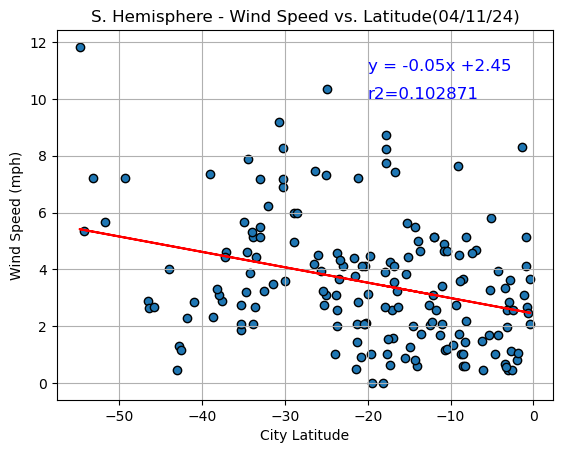

r-square << 0.7. The city latitue at southern hemisphere shows no correlation with Wind Speed


In [47]:
# Declare variables 
x_values = South_hem["Lat"]
y_values = South_hem["Wind Speed"]

# Build an equation of linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
r2 = "r2=" + str(round(rvalue**2, 6))

# Print r-square as the coefficient of the regression model
print(f"r-square: {rvalue**2}")

# Create the scatter plot with linear equation
plt.scatter(x_values,y_values, marker= "o", edgecolor="black")
plt.plot(x_values,regression,"r-")
plt.title("S. Hemisphere - Wind Speed vs. Latitude(%s)" % time.strftime("%x"))
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.annotate(line_eq,xy=(-20,11),fontsize=12,color="blue")
plt.annotate(r2, xy=(-20,10),fontsize=12,color="blue")
#Save the figure
plt.savefig("../output_data/S_Wind Speed_vs_lat_plot.png")

# Show plot 
plt.show()

# Disscussion about linear relationship
print(f"r-square << 0.7. The city latitue at southern hemisphere shows no correlation with Wind Speed")